# Linear Models - Regression

##  [Ordinary Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

In [1]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = datasets.load_diabetes()

In [3]:
print(type(data))
print(data.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'feature_names', 'DESCR', 'target', 'data_filename', 'target_filename'])


In [4]:
print(type(data.target))
print(type(data.data_filename))
print(type(data.DESCR))
print(type(data.feature_names))
print(type(data.target_filename))
print(type(data.data))

<class 'numpy.ndarray'>
<class 'str'>
<class 'str'>
<class 'list'>
<class 'str'>
<class 'numpy.ndarray'>


In [5]:
print(data.data_filename)
print(data.DESCR)
print(data.feature_names)
print(data.target_filename)

/usr/local/lib/python3.5/dist-packages/sklearn/datasets/data/diabetes_data.csv.gz
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https:

In [6]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [9]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [11]:
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


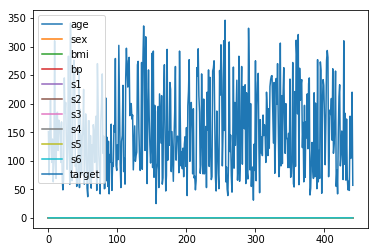

In [12]:
df.plot()

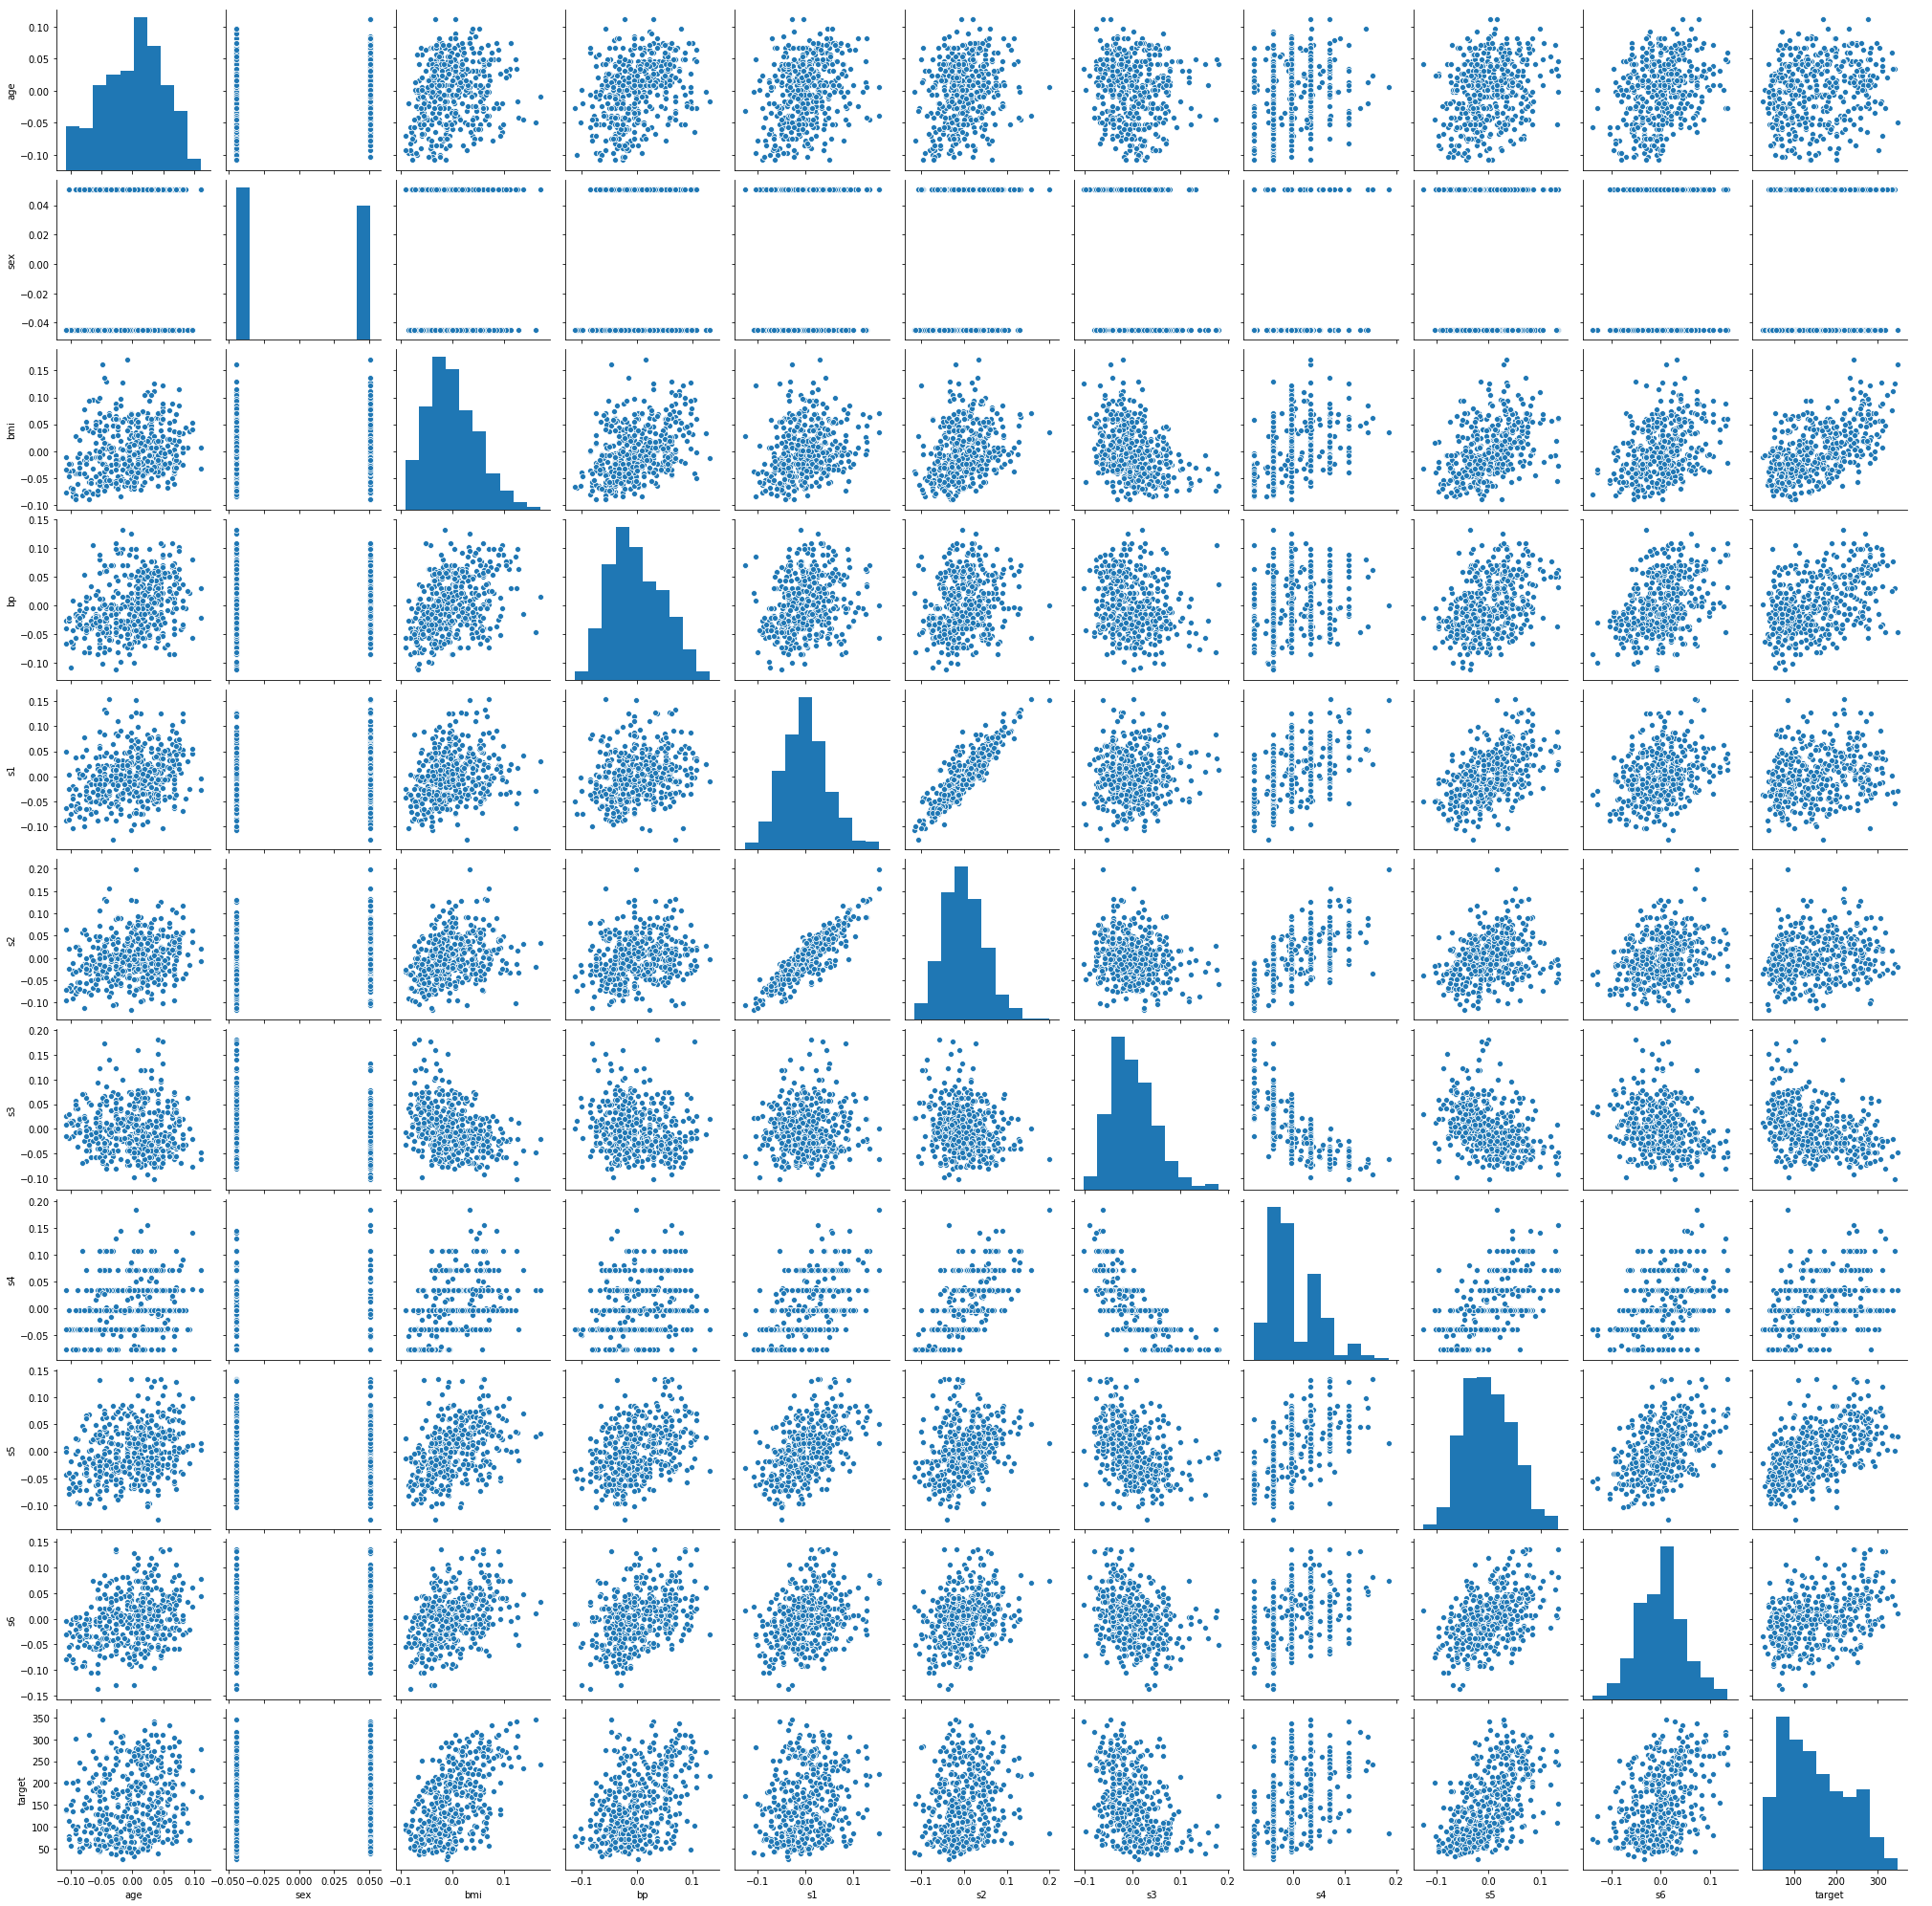

In [13]:
sns.pairplot(df)

In [14]:
X_train = data.data
y_train = data.target

In [15]:
print(X_train[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]


In [16]:
print(y_train[:5])

[151.  75. 141. 206. 135.]


In [17]:
# y = wx + b
model = linear_model.LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(model.coef_) # 기울기, w1, w2 ... wn

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


In [20]:
print('used features: {}'.format(np.sum(model.coef_ != 0)))

used features: 10


In [21]:
print(model.score(X_train, y_train)) 

0.5177494254132934


In [22]:
print(model.intercept_) # 절편, b

152.1334841628965


In [23]:
df.drop(columns=['target'], inplace=True)

In [24]:
X_train = np.array(df)
y_train = data.target

In [25]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(model.coef_)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


In [27]:
X_train = df[['bmi']].values
y_train = data.target

In [28]:
print(type(X_train))

<class 'numpy.ndarray'>


In [29]:
X_train.shape

(442, 1)

In [30]:
print(X_train[-5:])

[[ 0.01966154]
 [-0.01590626]
 [-0.01590626]
 [ 0.03906215]
 [-0.0730303 ]]


In [31]:
print(y_train[-5:])

[178. 104. 132. 220.  57.]


In [32]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print(model.score(X_train, y_train))

0.3439237602253803


In [34]:
print(model.coef_)

[949.43526038]


In [35]:
print(model.intercept_)

152.1334841628967


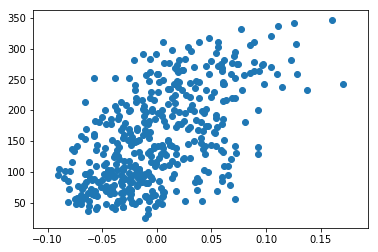

In [36]:
plt.scatter(X_train, y_train)

In [37]:
y = model.predict(X_train)

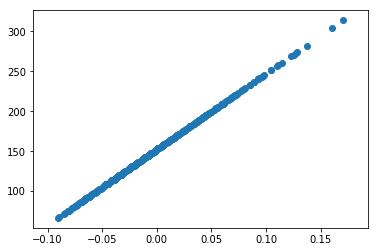

In [38]:
plt.scatter(X_train, y)

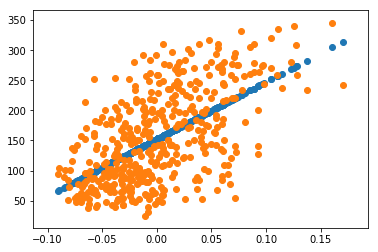

In [39]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

##  [Ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

In [40]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
data = datasets.load_diabetes()

In [42]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [43]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [44]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [45]:
X_train = df[['bmi']].values
y_train = data.target

In [46]:
# LInearRegression과 비슷하나 overfit이 덜 된다

model = linear_model.Ridge(alpha=0.5)

In [47]:
model.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
print(model.score(X_train, y_train))

0.3057100090892366


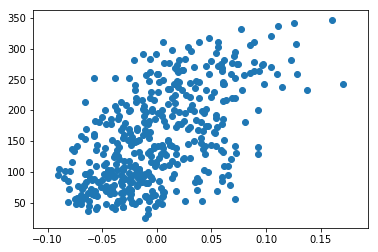

In [49]:
plt.scatter(X_train, y_train)

In [50]:
y = model.predict(X_train)

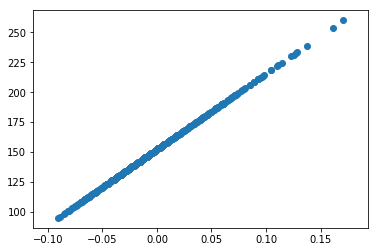

In [51]:
plt.scatter(X_train, y)

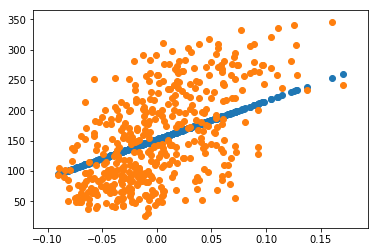

In [52]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso)

In [53]:
X_train = df[['bp']].values
y_train = data.target

In [54]:
model = linear_model.Lasso(alpha=0.1)

In [55]:
model.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
y = model.predict(X_train)

In [57]:
print(model.score(X_train, y_train))

0.1941626118355987


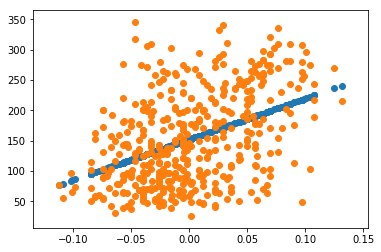

In [58]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Multi-mask Lasso](https://scikit-learn.org/stable/modules/linear_model.html#multi-task-lasso)

## [Elastic-Net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)

In [59]:
X_train = df[['bmi']].values
y_train = data.target

In [60]:
model = linear_model.ElasticNet()

In [61]:
model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
y = model.predict(X_train)

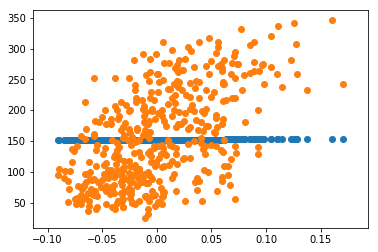

In [63]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Multi-task Elastic-Net](https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net)

## [Least Angle Regression](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression)

In [64]:
X_train = df[['bmi']].as_matrix()
y_train = data.target

In [65]:
model = linear_model.Lars(n_nonzero_coefs=1)

In [66]:
model.fit(X_train, y_train)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=1, normalize=True, precompute='auto', verbose=False)

In [67]:
y = model.predict(X_train)

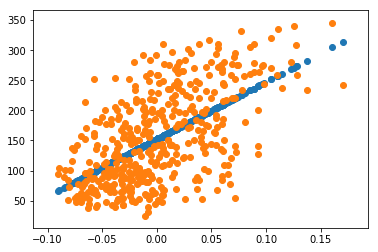

In [68]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [LARS Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lars-lasso)

In [69]:
X_train = df[['bmi']].as_matrix()
y_train = data.target

In [70]:
model = linear_model.LassoLars(alpha=0.1)

In [71]:
model.fit(X_train, y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

In [72]:
y = model.predict(X_train)

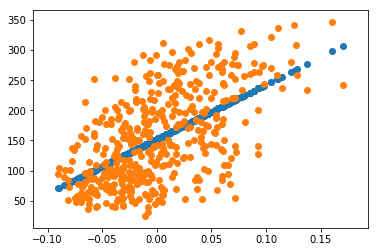

In [73]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Orthogonal Matching Pursuit](https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp)

In [74]:
X_train = df[['bmi']].as_matrix()
y_train = data.target

In [75]:
model = linear_model.OrthogonalMatchingPursuit()

In [76]:
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [77]:
y = model.predict(X_train)

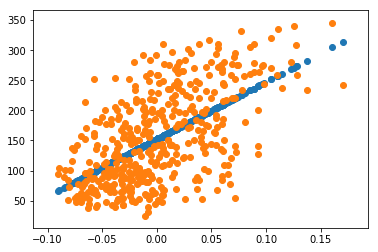

In [78]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Bayesian Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression)

In [79]:
X_train = df[['bmi']].as_matrix()
y_train = data.target

In [80]:
model = linear_model.BayesianRidge()

In [81]:
model.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [82]:
y = model.predict(X_train)

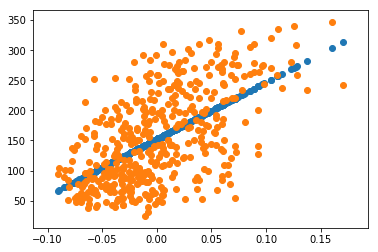

In [83]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

In [84]:
X_train = df[['bmi']].as_matrix()
y_train = data.target

In [85]:
model = linear_model.ARDRegression()

In [86]:
model.fit(X_train, y_train)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, threshold_lambda=10000.0, tol=0.001,
              verbose=False)

In [87]:
y = model.predict(X_train)

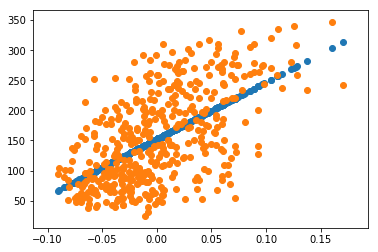

In [88]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [ Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd)

In [89]:
X_train = df[['bmi']].as_matrix()
y_train = data.target

In [90]:
model = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

In [91]:
model.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [92]:
y = model.predict(X_train)

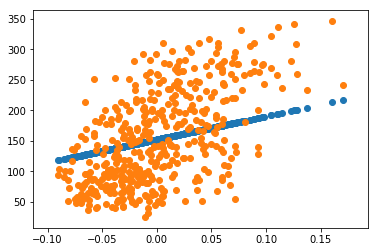

In [93]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)

In [94]:
X_train = df[['bmi']].as_matrix()
y_train = data.target

In [95]:
model = linear_model.PassiveAggressiveRegressor(max_iter=100, random_state=0, tol=1e-3)

In [96]:
model.fit(X_train, y_train)

PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=100,
                           n_iter_no_change=5, random_state=0, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [97]:
y = model.predict(X_train)

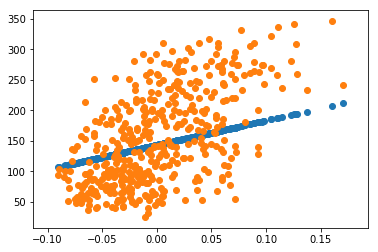

In [98]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Robustness regression](https://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors)

In [ ]:
X_train = df[['bmi']].as_matrix()
y_train = data.target

In [ ]:
model = linear_model.RANSACRegressor()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y = model.predict(X_train)

In [ ]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

In [ ]:
model = linear_model.TheilSenRegressor(random_state=42)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y = model.predict(X_train)

In [ ]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

In [ ]:
model = linear_model.HuberRegressor()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y = model.predict(X_train)

In [ ]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Polynomial regression](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)